# 1. Understand BigQuery Concepts

BigQuery es un almacén de datos (data warehouse) empresarial totalmente gestionado, sin servidor y altamente escalable ofrecido por Google Cloud Platform (GCP). Está diseñado para analizar grandes conjuntos de datos con una velocidad y rentabilidad sorprendentes.

### Diferencias clave con las bases de datos tradicionales (OLTP)

#### Arquitectura

BigQuery: Utiliza una arquitectura masivamente paralela (MPP) que separa el almacenamiento de los recursos de computación. Esto permite escalar cada uno de forma independiente según la necesidad. El almacenamiento se basa en Google Cloud Storage optimizado para el análisis, y la computación se realiza mediante una flota dinámica de servidores.

Bases de datos tradicionales: Suelen tener una arquitectura acoplada donde el almacenamiento y la computación residen en el mismo servidor o en un conjunto limitado de servidores. Escalar puede ser complejo y costoso, a menudo requiriendo tiempo de inactividad.

#### Modelo de Datos

BigQuery: Está optimizado para consultas analíticas (OLAP) sobre grandes volúmenes de datos. Si bien soporta algunas operaciones transaccionales, su fortaleza radica en el análisis complejo, agregaciones y consultas ad-hoc.

Bases de datos tradicionales: Principalmente diseñadas para procesamiento de transacciones en línea (OLTP), enfocándose en operaciones CRUD (Crear, Leer, Actualizar, Borrar) eficientes para un gran número de transacciones concurrentes.

#### Escalabilidad

BigQuery: Es altamente escalable de forma automática y transparente para el usuario. No es necesario aprovisionar ni gestionar la infraestructura. La capacidad de procesamiento y almacenamiento se ajusta dinámicamente según la demanda.

Bases de datos tradicionales: La escalabilidad puede ser un desafío, requiriendo la compra de hardware más potente o la implementación de técnicas como el particionamiento y la replicación, que pueden ser complejas de configurar y mantener.

#### Precios

BigQuery: El modelo de precios se basa principalmente en la cantidad de datos escaneados durante las consultas y el almacenamiento de los datos. Esto significa que solo pagas por lo que usas.

Bases de datos tradicionales: Suelen tener modelos de precios basados en la capacidad del servidor, licencias de software y, a veces, el volumen de datos.

#### Esquema

BigQuery: Aunque define un esquema, es más flexible en comparación con las bases de datos relacionales tradicionales. Soporta esquemas anidados y repetidos, lo que facilita el manejo de datos semiestructurados como JSON.

Bases de datos tradicionales: Generalmente requieren un esquema rígido y bien definido antes de la inserción de datos. Las alteraciones del esquema pueden ser costosas.

### Conceptos de datasets, tablas, schema y proyectos en BigQuery

En BigQuery, los datos se organizan jerárquicamente dentro de la plataforma Google Cloud Platform (GCP). Los principales componentes de esta organización son:

Proyecto (Project): Es el contenedor de nivel superior en GCP. Todos los recursos de GCP, incluyendo los datasets de BigQuery, están asociados a un proyecto. Un proyecto se utiliza para organizar, facturar y controlar el acceso a los recursos. Necesitas tener un proyecto de GCP para poder utilizar BigQuery. Los proyectos tienen un ID de proyecto único que se utiliza para identificarlo en las APIs y herramientas de línea de comandos.

Dataset: Un dataset es un contenedor lógico que se utiliza para organizar y agrupar tablas y vistas relacionadas. Piensa en un dataset como una base de datos en los sistemas de bases de datos tradicionales. Los datasets son específicos de una ubicación geográfica (por ejemplo, US para Estados Unidos, EU para Europa o una región específica como us-central1). Todos los datos dentro de un dataset residen en la misma ubicación. Dentro de un proyecto, puedes tener múltiples datasets para organizar tus datos por tema, departamento, entorno (desarrollo, producción), etc. Los datasets también se utilizan para controlar el acceso a las tablas que contienen. Puedes otorgar permisos a diferentes usuarios o grupos a nivel de dataset.

Tabla (Table): Una tabla en BigQuery contiene filas (records) y columnas (fields), al igual que una tabla en una base de datos relacional tradicional. Cada tabla tiene un schema que define el nombre, el tipo de datos y el modo (nullable, repeated) de cada columna. BigQuery soporta diferentes tipos de tablas.

* Tablas nativas de BigQuery: Almacenamiento gestionado por BigQuery.
* Tablas externas: Referencian datos almacenados en otras fuentes como Google Cloud Storage, Google Drive, etc.
* Vistas: Consultas SQL guardadas que actúan como tablas virtuales.
* Tablas materializadas: Vistas precomputadas para mejorar el rendimiento de consultas analíticas complejas.

El schema de una tabla define la estructura de los datos dentro de esa tabla.
Especifica el nombre de cada columna, su tipo de datos (por ejemplo, STRING, INTEGER, FLOAT, BOOLEAN, DATE, TIMESTAMP, ARRAY, STRUCT) y su modo. El modo indica si una columna es NULLABLE (puede contener valores nulos), REQUIRED (debe tener un valor) o REPEATED (puede contener una matriz de valores).

BigQuery puede detectar automáticamente el schema de los datos al cargarlos desde ciertas fuentes, pero es recomendable definirlo explícitamente para garantizar la integridad de los datos y optimizar las consultas.

BigQuery permite evolucionar el schema de una tabla con ciertas limitaciones (por ejemplo, agregar columnas, cambiar la relajación de REQUIRED a NULLABLE).

### Organización Jerárquica

La organización de los datos en BigQuery sigue una estructura jerárquica clara

```
Proyecto (Project)
    Dataset 1 (ubicación: ...)
        Tabla 1 (con su Schema)
        Tabla 2 (con su Schema)
        Vista 1 (basada en una consulta SQL)
    Dataset 2 (ubicación: ...)
        Tabla 3 (con su Schema)
```


# 2 Perform Queries in BigQuery

```
SELECT *
FROM `amco-data-analysis.ao.pedido`
LIMIT 10;
```

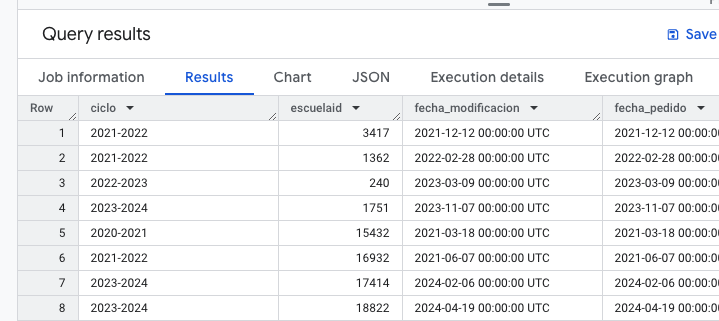

```
SELECT *
FROM `amco-data-analysis.ao.pedido`
WHERE ciclo = '2021-2022'
LIMIT 10;
```

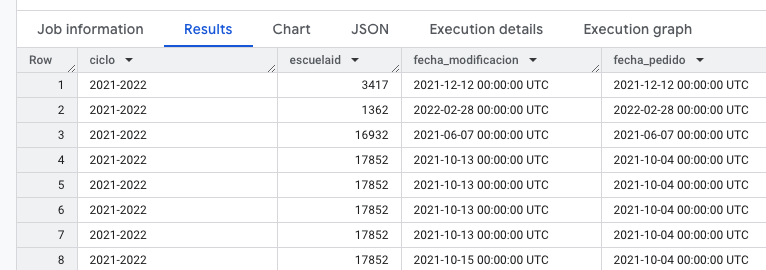

```
SELECT idioma, COUNT(*) AS count
FROM `amco-data-analysis.ao.pedido`
GROUP BY idioma;
```

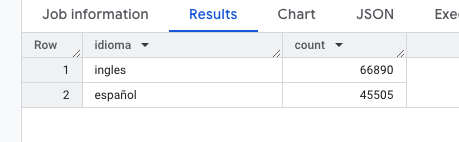

```
SELECT
    calendar_type,
    COUNT(estado) AS total_estado,
    COUNT(pais) AS total_pais
FROM
    `amco-data-analysis.ao.escuela`
GROUP BY
    calendar_type
HAVING
    COUNT(estado) > 600;
```

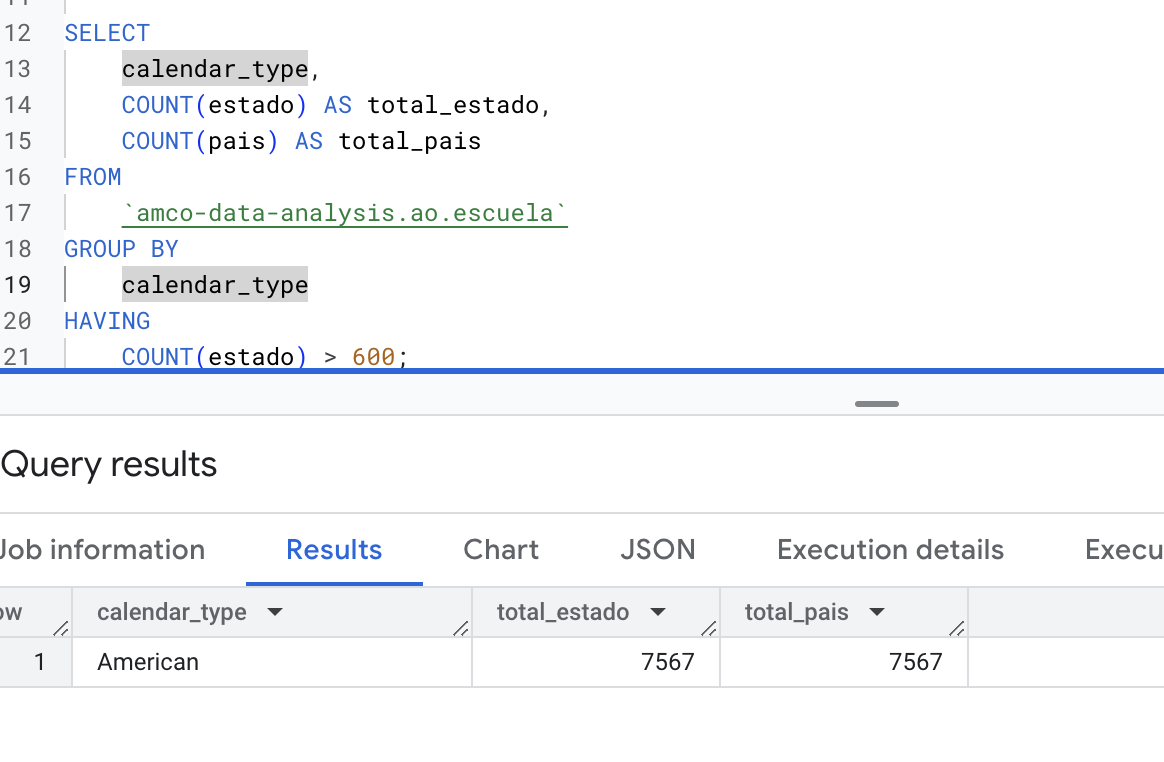

```
SELECT DISTINCT
      da.Users,
      COALESCE(au.user_id, u.user_id) AS id,
      COALESCE(au.school_id, u.school_id) AS school_id,
      au.rol,
      au.school_year
    FROM
      `amco-data-analysis.pivot_tables.deleted_accounts_dan_1857_v2` AS da
    LEFT JOIN
      `bs.active_users` AS au ON da.Users = au.google_account
    LEFT JOIN
      `bs.users` AS u ON da.Users = u.google_account
```

```
SELECT
    item.producto
FROM
    `amco-data-analysis.ao.precio_extend`,
    UNNEST(content) AS item;
```

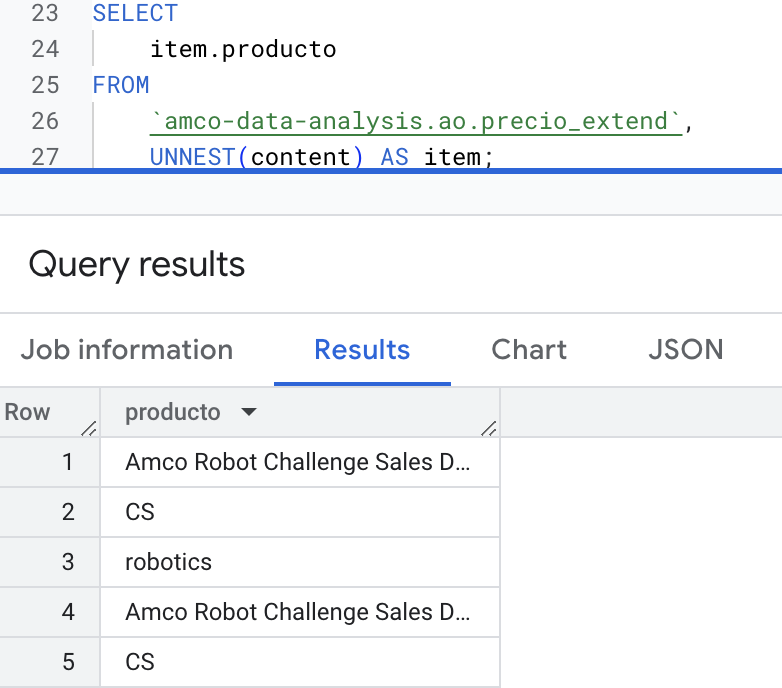

# 3 Scheduled Queries

Las consultas programadas en BigQuery te permiten automatizar la ejecución de consultas SQL de forma recurrente a intervalos específicos (por hora, diario, semanal, mensual, o en un horario personalizado). Esto es muy útil para generar informes periódicos, realizar transformaciones de datos incrementales, o mantener tablas actualizadas sin intervención manual.

- Programación flexible: Puedes definir la frecuencia de ejecución (por     ejemplo, todos los lunes a las 9 AM).
- Destinos de los resultados: Los resultados de la consulta programada pueden escribirse en una tabla de BigQuery (ya sea sobrescribiendo, añadiendo o usando una plantilla de partición/clúster), o no almacenarse.
- Notificaciones: Puedes configurar notificaciones por correo electrónico para cuando una ejecución de la consulta programada falla.
- Administración: La interfaz web y la API de BigQuery proporcionan herramientas para crear, ver, editar, pausar, reanudar y eliminar consultas programadas.
- Control de versiones: BigQuery mantiene un historial de las ejecuciones de la consulta programada.
- Costos: Se te cobrará por los recursos de computación utilizados cada vez que se ejecute la consulta programada, al igual que con las consultas ad-hoc.

```
SELECT
    country,
    SUM(amount) AS total_sales
FROM
    `amco-data-analysis.ao.payments`
WHERE
    DATE(created_at) >= DATE_SUB(CURRENT_DATE(), INTERVAL 7 DAY)
    AND DATE(created_at) < CURRENT_DATE()
GROUP BY
    country
ORDER BY
    total_sales DESC;
```

# 4 Working with Views

Una vista en BigQuery es una tabla virtual definida por una consulta SQL. A diferencia de una tabla regular, una vista no almacena datos en sí misma. En cambio, cada vez que se consulta una vista, BigQuery ejecuta la consulta subyacente y muestra los resultados.

```
CREATE OR REPLACE VIEW `amco-data-analysis.training_bq.DAN-1806` AS
SELECT
    country,
    SUM(amount) AS total_sales
FROM
    `amco-data-analysis.ao.payments`
WHERE
    DATE(created_at) >= DATE_SUB(CURRENT_DATE(), INTERVAL 7 DAY)
    AND DATE(created_at) < CURRENT_DATE()
GROUP BY
    country
ORDER BY
    total_sales DESC;
```

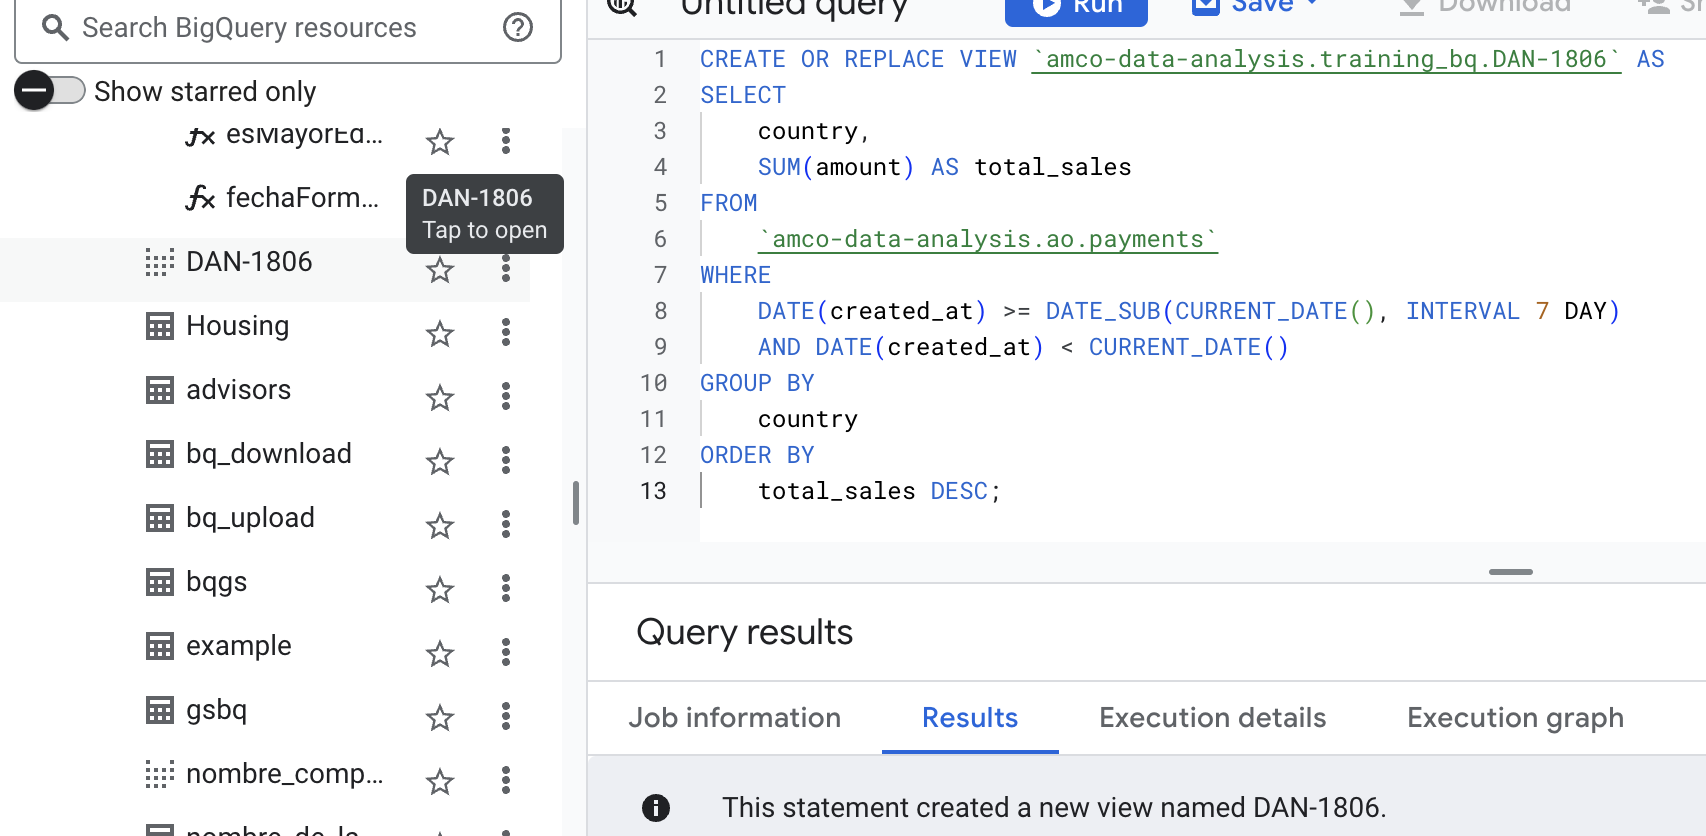

# 5 User-Defined Functions (UDFs)

En BigQuery, puedes crear UDFs utilizando dos lenguajes principales:

JavaScript UDFs: Te permiten escribir funciones utilizando la sintaxis de JavaScript. Son muy flexibles y pueden realizar lógica compleja, manipulación de strings, operaciones con arrays y objetos, e incluso interactuar con servicios externos (con ciertas limitaciones).

SQL UDFs: Te permiten definir funciones utilizando expresiones SQL. Son más limitadas en cuanto a la complejidad lógica que pueden implementar, pero son más directas para transformaciones sencillas y reutilización de lógica SQL.

```
CREATE TEMPORARY FUNCTION
  formatTimestampToDDMMYYYY(timestamp_value TIMESTAMP)
RETURNS STRING
LANGUAGE js AS """
  if (!timestamp_value) return null;
  const date = new Date(timestamp_value.getTime()); // Convert BigQuery TIMESTAMP to JavaScript Date
  const day = String(date.getUTCDate()).padStart(2, '0');
  const month = String(date.getUTCMonth() + 1).padStart(2, '0'); // JavaScript months are 0-indexed
  const year = date.getUTCFullYear();
  return `${day}/${month}/${year}`;
""";
```

```
SELECT
    created_at,
    formatTimestampToDDMMYYYY(created_at) AS formatted_date
FROM
    `amco-data-analysis.ao.commissions_schools_rates`
LIMIT 10;
```

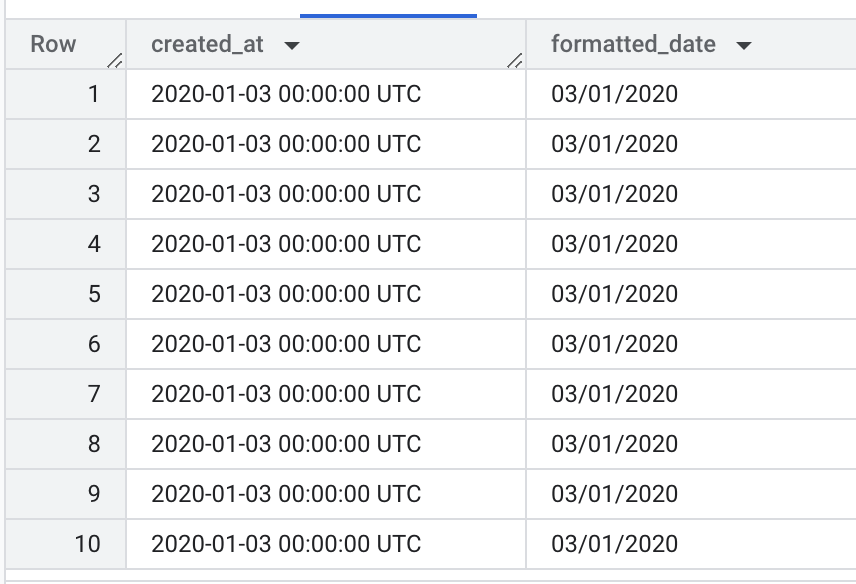

# 6  Modify Tables (CRUD Operations)

```
CREATE TABLE `amco-data-analysis.training_bq.DAN-1806_table` (
       id INT64,
       name STRING,
       city STRING,
       age INT64
   );
```

```  
INSERT INTO `amco-data-analysis.training_bq.DAN-1806_table` (id, name, city, age)
   VALUES
       (1, 'Alice', 'New York', 30),
       (2, 'Bob', 'Los Angeles', 25),
       (3, 'Charlie', 'Chicago', 35);
```

```
UPDATE `amco-data-analysis.training_bq.DAN-1806_table`
   SET
       city = 'San Francisco',
       age = 26
   WHERE
       id = 2;
```

```
DELETE FROM `amco-data-analysis.training_bq.DAN-1806_table`
   WHERE
       id = 3;
```

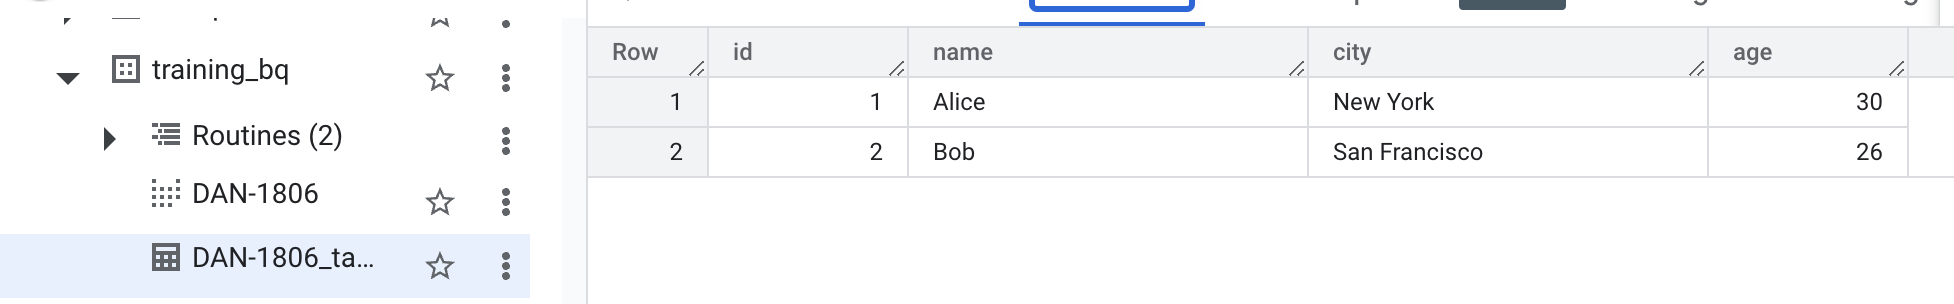


# 7 BigQuery SDK (Python)

Hay un error que esta relacionado con un tema de permisos

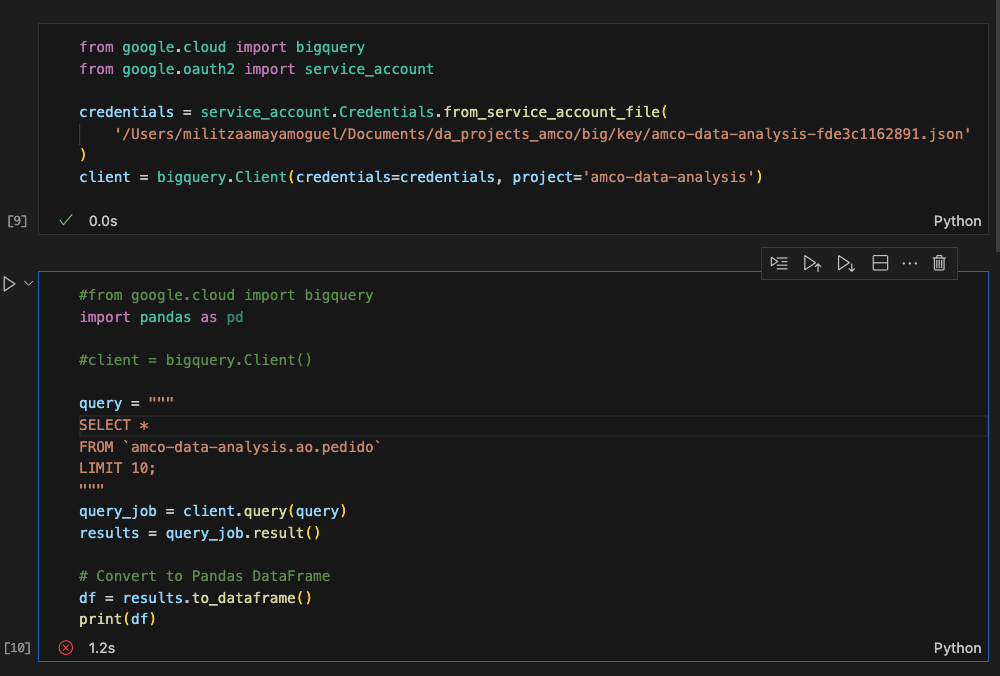